In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [4]:
# Step 1: Load the Dataset
data = pd.read_csv('creditcard.csv')

In [5]:
# Step 2: Preprocessing
# Normalize 'Amount' and 'Time' using StandardScaler
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

In [7]:
# Step 3: Handle Class Imbalance via Under-Sampling
fraud = data[data['Class'] == 1]  # All fraud cases
non_fraud = data[data['Class'] == 0]  # All legitimate cases

# Downsample legitimate transactions to match the number of fraud cases
non_fraud_downsampled = non_fraud.sample(len(fraud), random_state=42)

# Combine the downsampled legitimate transactions with all fraud cases
balanced_data = pd.concat([fraud, non_fraud_downsampled], axis=0)

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Prepare features (X) and target (y)
X_balanced = balanced_data.drop('Class', axis=1)
y_balanced = balanced_data['Class']

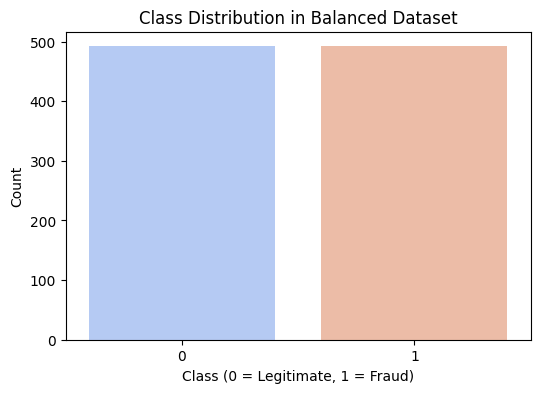

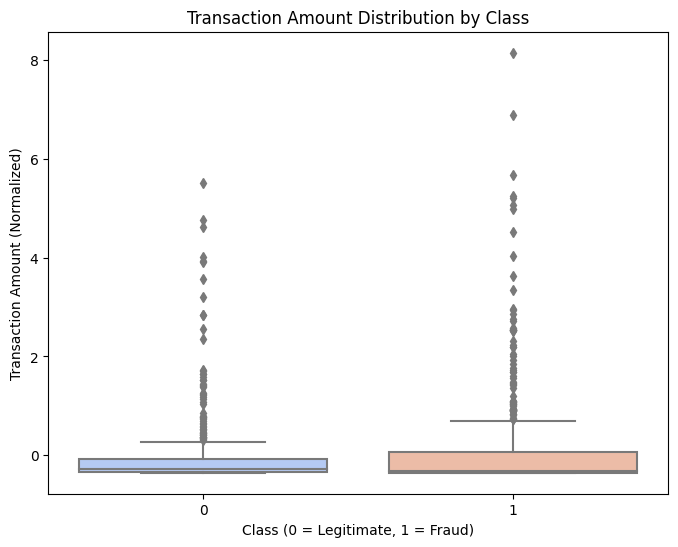

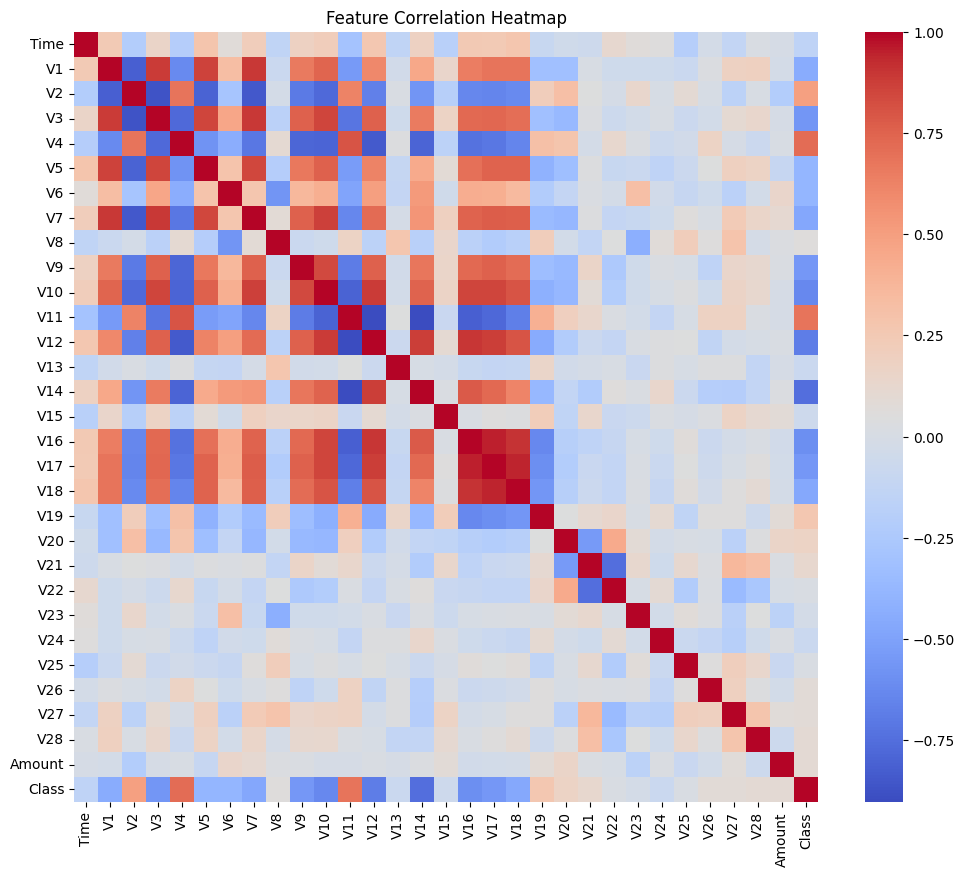

In [8]:
# Step 4: Exploratory Data Analysis (EDA)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_balanced, palette='coolwarm')
plt.title("Class Distribution in Balanced Dataset")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Visualize 'Amount' distributions for fraud and non-fraud transactions
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_balanced, y=X_balanced['Amount'], palette='coolwarm')
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Transaction Amount (Normalized)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = balanced_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

In [10]:
# Step 6: Model Training with Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Step 7: Model Evaluation
# Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

Confusion Matrix:
[[143   5]
 [ 15 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       148
           1       0.96      0.90      0.93       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296


ROC-AUC Score: 0.98


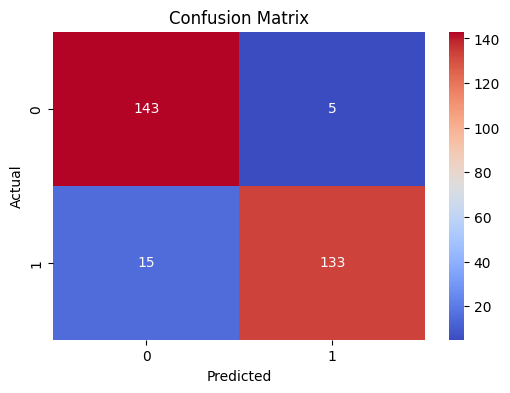

In [13]:

# Step 8: Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# Save the model
joblib.dump(rf_model, 'model.pkl')

['model.pkl']